In [1]:
!pip install -U torch torchvision > /dev/null 2>&1
!git clone https://github.com/Shulin-Zhang/pytorch_models.git > /dev/null 2>&1

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import numpy as np
from matplotlib import pylab as plt

from pytorch_models.image_classification.minist import minist
from pytorch_models.image_classification.minist.resnet import Resnet
from pytorch_models.image_classification.minist.resnext import ResNeXt
from pytorch_models.image_classification.minist.se_resnet import SE_resnet
from pytorch_models.utils.classification_learner import Learner
from pytorch_models.utils.lr_finder import Lr_finder

In [34]:
trainloader, testloader = minist.build_minist_loader('./data/minist', batch=64, workers=2)

In [4]:
def plot_batch(loader):
    imgs = next(iter(loader))[0]
    grid = torchvision.utils.make_grid(imgs)
    grid = grid.numpy().transpose([1, 2, 0]) * 255
    plt.figure(figsize=(12, 12))
    plt.axis('off')
    plt.imshow(grid)

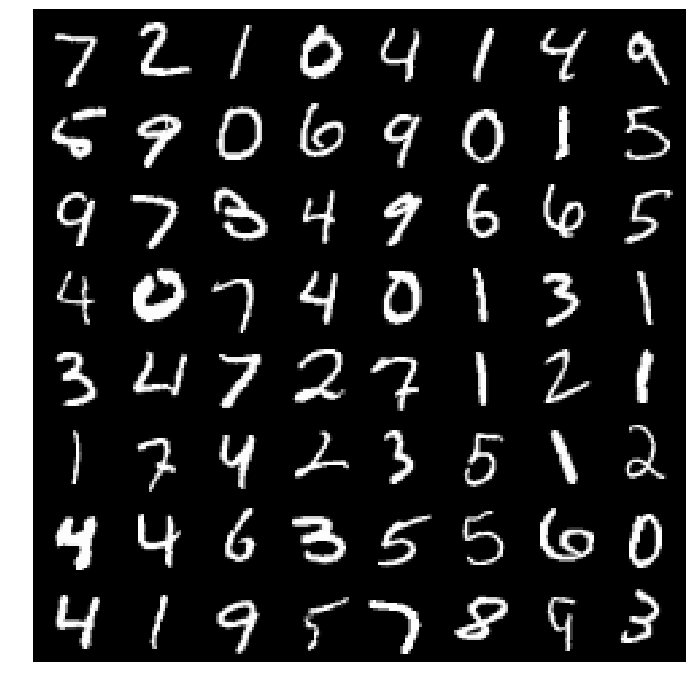

In [5]:
plot_batch(testloader)

In [28]:
model = Resnet(10, 1, activation=nn.ReLU(True))

## 寻找最大学习率

In [7]:
lr_finder = Lr_finder(model, trainloader, nn.CrossEntropyLoss(), optim.SGD(model.parameters(), 0.1, weight_decay=0.003))

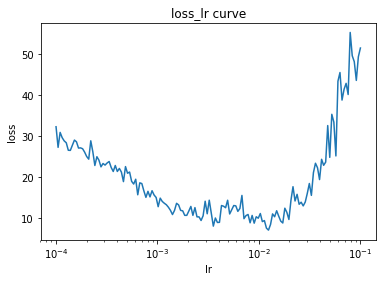

In [8]:
lr_finder.lr_find(steps=150, lr_range=(1e-4, 1e-1), plot=True)

In [29]:
learn = Learner(model)

In [30]:
steps, losses = learn.fit(trainloader, 3e-2, 12, weight_decay=0.003, print_steps=200)

epoch: 1    	step: 200    	loss: 1.7684
epoch: 1    	step: 400    	loss: 3.5533
epoch: 1    	step: 600    	loss: 0.4467
epoch: 1    	step: 800    	loss: 1.1183
epoch: 2    	step: 200    	loss: 0.5278
epoch: 2    	step: 400    	loss: 0.2387
epoch: 2    	step: 600    	loss: 0.0896
epoch: 2    	step: 800    	loss: 0.0647
epoch: 3    	step: 200    	loss: 0.1185
epoch: 3    	step: 400    	loss: 0.0350
epoch: 3    	step: 600    	loss: 0.0653
epoch: 3    	step: 800    	loss: 0.0701
epoch: 4    	step: 200    	loss: 0.0687
epoch: 4    	step: 400    	loss: 0.0511
epoch: 4    	step: 600    	loss: 0.0126
epoch: 4    	step: 800    	loss: 0.1189
epoch: 5    	step: 200    	loss: 0.0406
epoch: 5    	step: 400    	loss: 0.0554
epoch: 5    	step: 600    	loss: 0.0473
epoch: 5    	step: 800    	loss: 0.1178
epoch: 6    	step: 200    	loss: 0.1946
epoch: 6    	step: 400    	loss: 0.0856
epoch: 6    	step: 600    	loss: 0.1351
epoch: 6    	step: 800    	loss: 0.1288
epoch: 7    	step: 200    	loss: 0.0474


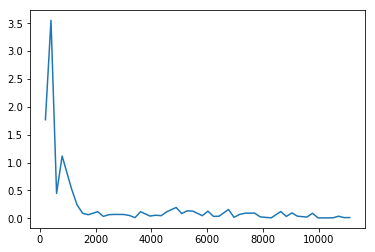

In [31]:
plt.plot(steps, losses)

In [32]:
learn.evaluate(trainloader)

0.9962

In [33]:
learn.evaluate(testloader)

0.9956

In [35]:
test_predictions = learn.predict(testloader)
test_predictions = np.argmax(test_predictions, axis=1)
test_predictions.shape

(10000,)

In [36]:
test_labels = [data[1].numpy() for data in testloader]
test_labels = np.concatenate(test_labels)
test_labels.shape

(10000,)

In [37]:
test_imgs = [data[0].numpy() for data in testloader]
test_imgs = np.concatenate(test_imgs)
test_imgs.shape

(10000, 1, 28, 28)

In [38]:
error_index = np.argwhere(test_predictions != test_labels)

In [39]:
error_imgs = test_imgs[error_index].squeeze()
error_labels = test_labels[error_index].squeeze()
error_predictions = test_predictions[error_index].squeeze()
error_imgs.shape, error_labels.shape, error_predictions.shape

((54, 28, 28), (54,), (54,))

## 测试集中预测错误的样本

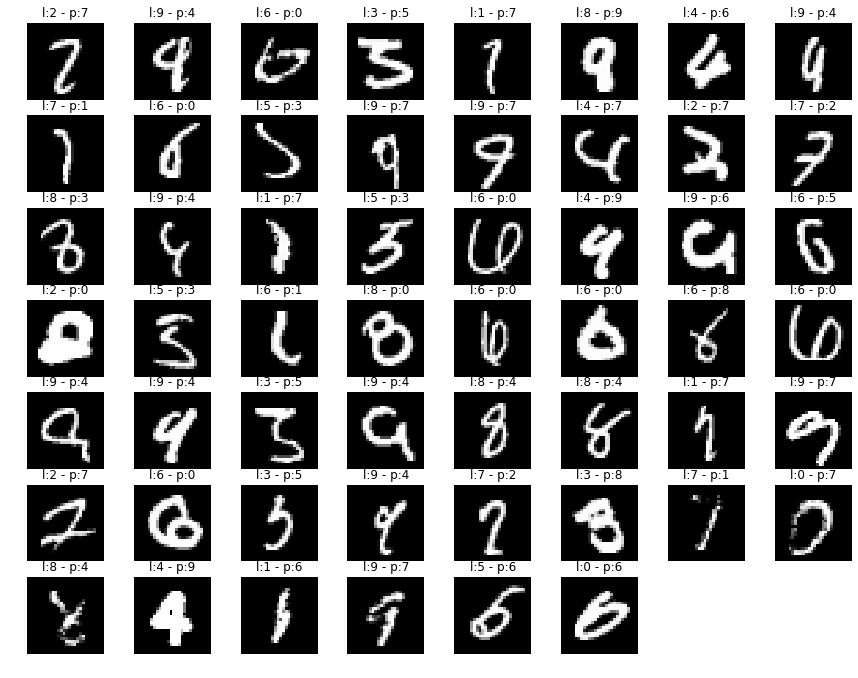

In [40]:
plt.figure(figsize=(15, 15))
step = 1
for img, label, pre in zip(error_imgs, error_labels, error_predictions):
    plt.subplot(9, 8, step)
    plt.axis('off')
    plt.imshow(img, cmap='gray')
    plt.title(f"l:{label} - p:{pre}")
    step += 1